In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time

In [3]:
#this code is the same as the code for "2D_case1.ipynb" just with one boundary condition changed
a =1.0
b=1.0
V0=1.0
dx=1.0/100 
xmin = 0 
xmax = a 
ymin = 0 
ymax = b
nx=int((xmax-xmin)/dx)
ny=int((ymax-ymin)/dx)
x0=np.linspace(xmin,xmax,nx+1)
y0=np.linspace(ymin,ymax,ny+1)
x,y=np.meshgrid(x0,y0)
print("dx=",dx)
print(x.shape)

dx= 0.01
(101, 101)


In [4]:
V=np.zeros_like(x)

In [5]:
#boundary conditions, aside from the last one, this is the same as case1 
V[:,0]= 0 #x = 0, y 
V[:,-1]=0 #x = a, y 
V[-1,:]=0 # x, y = b
V[0,:] = V0 #changed to be constant 



In [6]:
# Tolerance for convergence
eps=1.0e-6

# Carry out the first round of the averaging scheme and calculate the residual
V1=np.copy(V) # a temporary array to store the updated values of V
V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:]) # carry out the average
resid=np.sum(np.fabs(V1-V)) # calculate the initial residual
resid0=resid
V=np.copy(V1) # Put updated values into the array V

start=time.time()
it=0
while (resid/resid0>eps): # Loop criterion: we use relative residual here
    V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:])
    resid=np.sum(np.fabs(V1-V))
    V=np.copy(V1)
    it=it+1
end=time.time()
print("Number of iterations:",it)
print("The time spent is",end-start,"s")

Number of iterations: 21064
The time spent is 1.464064121246338 s


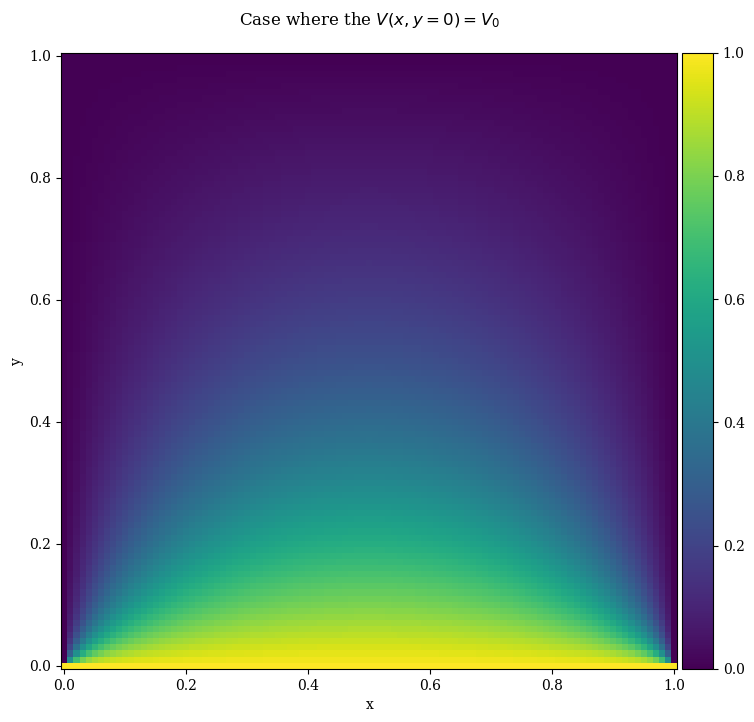

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111)
im = plt.pcolormesh(x, y, V)
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title("Case where the $V(x,y = 0) = V_0$", pad=20)
plt.savefig('case2.png')
plt.show()


In [8]:
import k3d
from k3d.colormaps import matplotlib_color_maps
plt_surface = k3d.surface(V,
                          xmin=x0[0], xmax=x0[-1],
                          ymin=y0[0], ymax=y0[-1],
                          # wireframe=True,
                          # compression_level=9,
                          color_map=matplotlib_color_maps.Coolwarm,
                          attribute=V, color_range=[np.amin(V), np.amax(V)])


plot = k3d.plot()
plot += plt_surface
plot.display()

/Users/cassiemetzger/opt/anaconda3/lib/python3.9/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()